In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import k3d
import numpy as np
sns.set_style(style="darkgrid")

## Observables

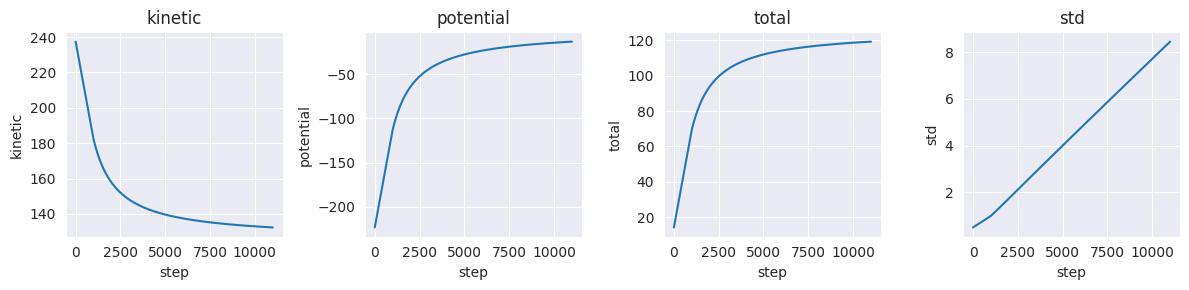

In [3]:
observables = pd.read_csv('energy.txt', sep='\t', header=None)
observables.columns = ['step', 'kinetic', 'potential','total','std']

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True)

for ax, col in zip(axes, ['kinetic', 'potential', 'total','std'], strict=True):
    sns.lineplot(data=observables, x='step', y=col, ax=ax)
    ax.set_title(col)

for ax in axes:
    ax.ticklabel_format(useOffset=False)
plt.tight_layout()
plt.show()

# Trajectory

In [18]:
trajectory = pd.read_csv('trajectory.txt', sep='\t', header=None)
trajectory.columns = ['step', 'id', 'x', 'y', 'z','mass']

steps = np.unique(trajectory.step)
positions_by_step = [group[['x','y','z']].values for _, group in trajectory.groupby('step')]

trajplot = k3d.plot()
points = k3d.points(positions_by_step[0], point_size=1e-1, color=0xff0000)
trajplot += points
trajplot.display()

points.positions = {i: pos for i, pos in enumerate(positions_by_step)}

/home/giulio/projects/frog/.venv/lib/python3.12/site-packages/traittypes/traittypes.py:98: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()